In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

In [3]:
# pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [4]:
import os
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

## Configuration

### Input files and FE algorithms to be studied
0PU photon data are loaded

In [10]:
algo_files = {}
directory = 'Documents/LLR/FPGAs/'
fes = ['Threshold']

for fe in fes:
    algo_files[fe] = [ os.path.join(os.environ['HOME'], directory, 'out.hdf5') ]

## Loading and preprocessing dataframes

In [11]:
algos_dfs = {}
for fe,files in algo_files.items():
    name = fe
    dfs = []
    for file in files:
        with pd.HDFStore(file, mode='r') as store:
            dfs.append(store[name])
    algos_dfs[fe] = pd.concat(dfs)
algo_names = sorted(algos_dfs.keys())

In [12]:
#Cleaning
df = algos_dfs['Threshold']
df = df[ df['genpart_exeta']>0 ]
df = df[ df['cl3d_eta']>0 ]

In [13]:
df['enres'] = ( df['genpart_energy']-df['cl3d_energy'] ) / df['genpart_energy']

In [14]:
nansel = pd.isna(df['enres']) 
nandf = df[nansel]
nandf['enres'] = 1.1
df = df[~nansel]
df = pd.concat([df,nandf], sort=False)
counts, edges = np.histogram(df['enres'].array, bins=500)
nandf

,genpart_pid,genpart_exphi,genpart_exeta,genpart_gen,genpart_reachedEE,genpart_pt,genpart_energy,cl3d_energy,cl3d_pt,cl3d_eta,...,cl3d_layer90,cl3d_ntc67,cl3d_ntc90,cl3d_layer_pt,deta,dphi,deltar,matches,best_match,enres
event,,,,,,,,,,,,,,,,,,,,,


In [15]:
matplotlib.rcParams.update({'font.size': 11})
def plot_histo_quick(df1, df2, var, nbins=600):
    plt.figure(figsize=(12,4))
    plt.subplot(211)
    plt.hist(df1[var], bins=nbins)
    plt.grid()
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.subplot(221)
    plt.hist(df2[var], bins=nbins)
    plt.grid()
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.show()

In [16]:
enrescut = 0.3
duplicated = df[ df['enres'] > enrescut ]
duplicated.columns

Index(['genpart_pid', 'genpart_exphi', 'genpart_exeta', 'genpart_gen',
       'genpart_reachedEE', 'genpart_pt', 'genpart_energy', 'cl3d_energy',
       'cl3d_pt', 'cl3d_eta', 'cl3d_phi', 'cl3d_showerlength',
       'cl3d_coreshowerlength', 'cl3d_firstlayer', 'cl3d_maxlayer',
       'cl3d_seetot', 'cl3d_spptot', 'cl3d_szz', 'cl3d_srrtot', 'cl3d_srrmean',
       'cl3d_hoe', 'cl3d_meanz', 'cl3d_layer10', 'cl3d_layer50',
       'cl3d_layer90', 'cl3d_ntc67', 'cl3d_ntc90', 'cl3d_layer_pt', 'deta',
       'dphi', 'deltar', 'matches', 'best_match', 'enres'],
      dtype='object')

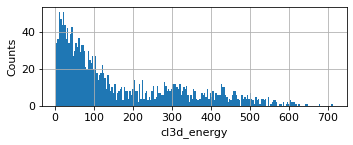

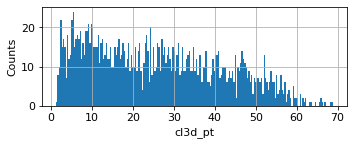

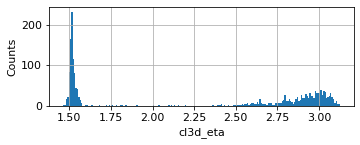

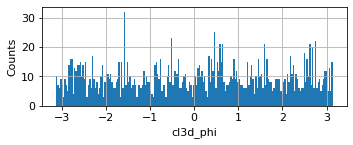

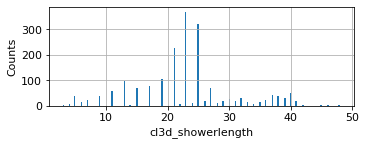

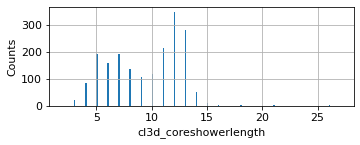

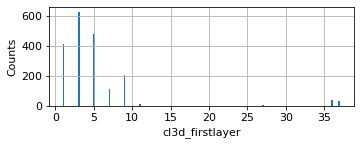

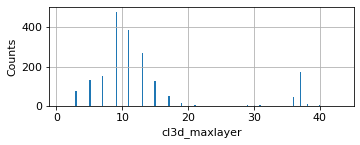

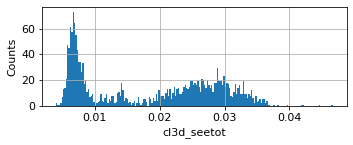

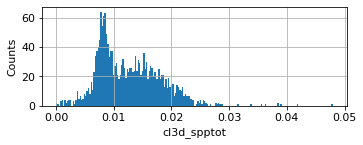

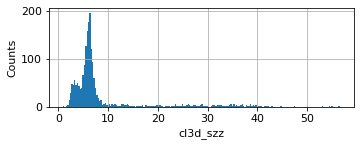

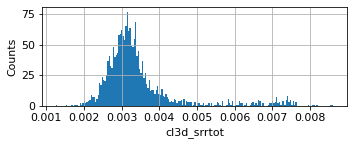

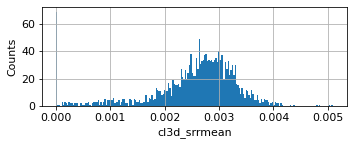

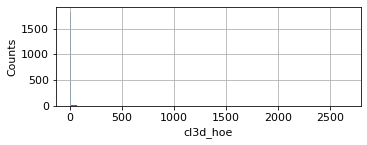

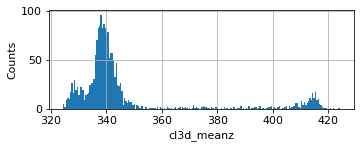

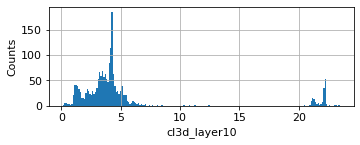

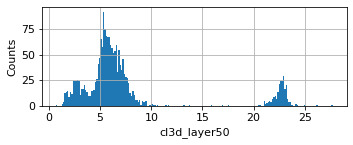

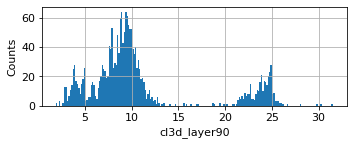

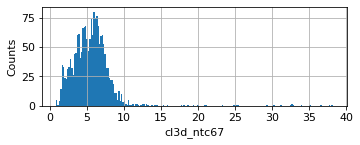

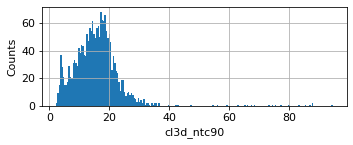

In [ ]:
for col in duplicated.columns:
    if 'cl3d' in col:
        plot_histo_quick(df, duplicated, var=col, nbins=200)